# Analyse des données brutes : boxplot, variance, écart type

#### Lecture des données 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lecture des données présentes dans le dépôt

# TRAIN DATA
train_data_file = "store_train.data"
train_data_df = pd.read_csv(train_data_file ,sep=" ",header=None, names = ["ID", "Day", "Date", "Number_of_Customers", "Open", "Promo", "State_Holiday", "School_Holiday"])
train_data_df["Date"]=pd.DataFrame(train_data_df["Date"],dtype="datetime64[ns]")
train_data_df["State_Holiday"]=pd.DataFrame(train_data_df["State_Holiday"],dtype="bool")
train_data_df["State_Holiday"]=pd.DataFrame(train_data_df["State_Holiday"],dtype="int")
train_data_df['Month'] = train_data_df['Date'].map(lambda d: d.month)
train_data_df["Month"]=pd.DataFrame(train_data_df["Month"],dtype=int)
train_data_df['Day_of_month'] = train_data_df['Date'].map(lambda d: d.day)
train_data_df["Day_of_month"]=pd.DataFrame(train_data_df["Day_of_month"],dtype=int)
train_data_df['Year'] = train_data_df['Date'].map(lambda d: d.year)
train_data_df["Year"]=pd.DataFrame(train_data_df["Year"],dtype=int)
del train_data_df["Date"]
#train_data_df.head()

# SOLUTIONS DATA
train_solutions_file = "store_train.solution"
train_solutions_df = pd.read_csv(train_solutions_file ,sep=" ",header=None, names = ["ObservedSales"])
#train_solutions_df.head()

# TEST DATA
test_data_file = "store_test.data"
test_data_df = pd.read_csv(test_data_file ,sep=" ",header=None, names = ["ID", "Day", "Date", "Number_of_Customers", "Open", "Promo", "State_Holiday", "School_Holiday"])
test_data_df["Date"]=pd.DataFrame(test_data_df["Date"],dtype="datetime64[ns]")
test_data_df["State_Holiday"]=pd.DataFrame(test_data_df["State_Holiday"],dtype="bool")
test_data_df["State_Holiday"]=pd.DataFrame(test_data_df["State_Holiday"],dtype="int")
test_data_df['Month'] = test_data_df['Date'].map(lambda d: d.month)
test_data_df["Month"]=pd.DataFrame(test_data_df["Month"],dtype=int)
test_data_df['Day_of_month'] = test_data_df['Date'].map(lambda d: d.day)
test_data_df["Day_of_month"]=pd.DataFrame(test_data_df["Day_of_month"],dtype=int)
test_data_df['Year'] = test_data_df['Date'].map(lambda d: d.year)
test_data_df["Year"]=pd.DataFrame(test_data_df["Year"],dtype=int)
del test_data_df["Date"]
#test_data_df.head()

In [34]:
# EXTRA DATA (NON FONCTIONNEL POUR L'INSTANT : extra data ne contient que 1000 lignes...)
extra_data_file = "store_extra_data.csv"
extra_data_df = pd.read_csv(extra_data_file, header=None)#, names = ["Store", "StoreType", "Assortment", "CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2","Promo2SinceWeek","Promo2SinceYear","PromoInterval"])
extra_data_df.head()

augmented_data_df = train_data_df.join(extra_data_df, how = 'right')
augmented_data_df.head()

,ID,Day,Number_of_Customers,Open,Promo,State_Holiday,School_Holiday,Month,Day_of_month,Year,0,1,2,3,4,5,6,7,8,9
0,625,3,641,1,1,1,0,11,6,2013,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1,293,2,877,1,1,1,1,7,16,2013,1,c,a,1270,9,2008,0,NaN,NaN,NaN
2,39,4,561,1,1,1,0,1,23,2014,2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
3,676,4,1584,1,1,1,0,9,26,2013,3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
4,709,3,1477,1,1,1,0,1,22,2014,4,c,c,620,9,2009,0,NaN,NaN,NaN


#### Essais d'analyse des données

In [3]:
train_df = train_data_df.join(train_solutions_df, how = 'right')
# Vérification du contenu
# Label of the data : Store, DayOfWeek, Date, Customers, Open, Promo, StateHoliday, SchoolHoliday
train_df.head()

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,ScoolHoliday,ObservedSales
0,625,3,2013-11-06,641,1,1,0,0,7293
1,293,2,2013-07-16,877,1,1,0,1,7060
2,39,4,2014-01-23,561,1,1,0,0,4565
3,676,4,2013-09-26,1584,1,1,0,0,6380
4,709,3,2014-01-22,1477,1,1,0,0,11647


In [4]:
# train_df["Store"] = pd.Categorical(train_df["STATION"],ordered=False)

train_df["Store"] = pd.DataFrame(train_df["Store"], dtype=int)
train_df["DayOfWeek"] = pd.DataFrame(train_df["DayOfWeek"], dtype=int)
train_df["Date"] = pd.DataFrame(train_df["Date"], dtype="datetime64[ns]")
train_df["Customers"] = pd.DataFrame(train_df["Customers"], dtype=int)
train_df["Open"] = pd.DataFrame(train_df["Open"], dtype=bool)
train_df["Promo"] = pd.DataFrame(train_df["Promo"], dtype=bool)
train_df["StateHoliday"] = pd.DataFrame(train_df["StateHoliday"], dtype=bool)
train_df["ScoolHoliday"] = pd.DataFrame(train_df["ScoolHoliday"], dtype=bool)
train_df["ObservedSales"] = pd.DataFrame(train_df["ObservedSales"], dtype=int)

train_df.dtypes


Store                     int32
DayOfWeek                 int32
Date             datetime64[ns]
Customers                 int32
Open                       bool
Promo                      bool
StateHoliday               bool
ScoolHoliday               bool
ObservedSales             int32
dtype: object

In [5]:
train_df.describe()

,Store,DayOfWeek,Customers,ObservedSales
count,712045.000000,712045.000000,712045.000000,712045.000000
mean,558.314199,4.000265,633.399958,5776.336748
std,321.898476,1.996580,464.360651,3851.273075
min,1.000000,1.000000,0.000000,0.000000
25%,280.000000,2.000000,405.000000,3729.000000
50%,558.000000,4.000000,609.000000,5746.000000
75%,837.000000,6.000000,838.000000,7859.000000
max,1115.000000,7.000000,5494.000000,41551.000000


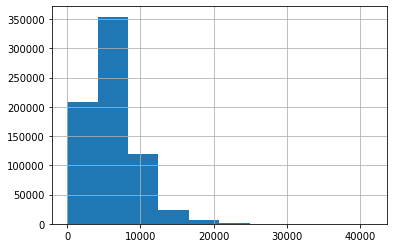

In [8]:
train_df["ObservedSales"].hist()

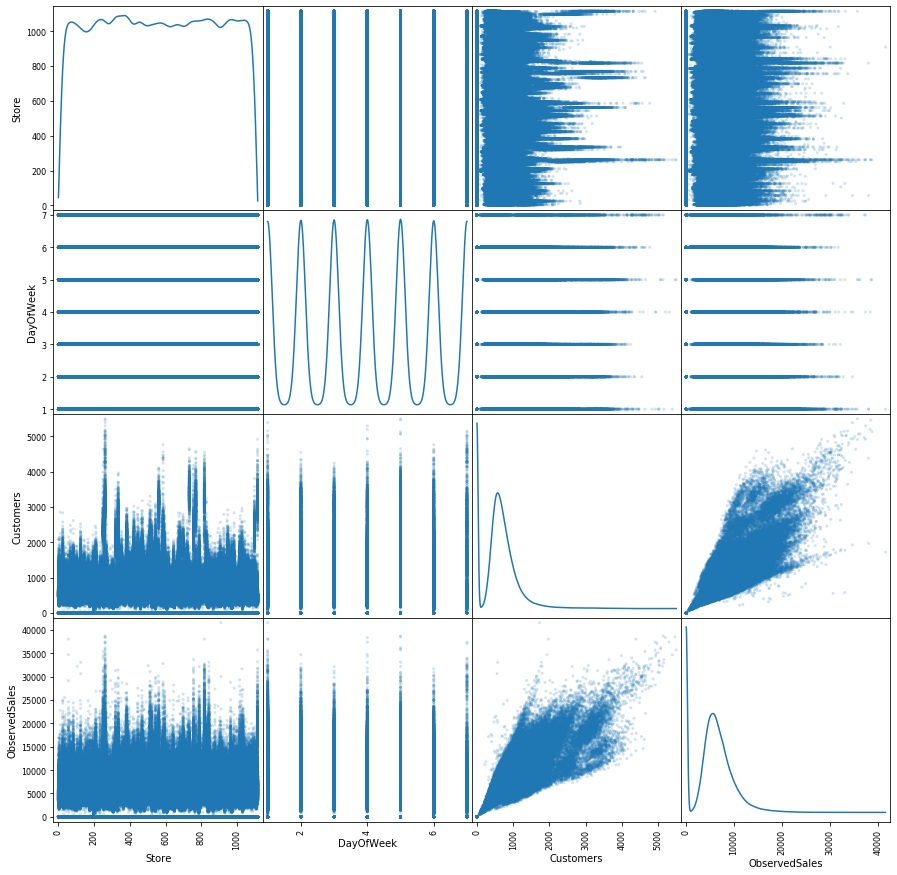

In [9]:
# scatter plot matrix des variables quantitatives
from pandas.plotting import scatter_matrix
scatter_matrix(train_df[["Store", "DayOfWeek", "Customers","ObservedSales"]], alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

In [6]:
# Plot observed sales en fonction de la date
train_df['Month'] = train_df['Date'].map(lambda d: d.month)
train_df['Year'] = train_df['Date'].map(lambda d: d.year)
train_df['Day'] = train_df['Date'].map(lambda d: d.day)
train_df.describe()

,Store,DayOfWeek,Customers,ObservedSales,Month,Year,Day
count,712045.000000,712045.000000,712045.000000,712045.000000,712045.000000,712045.000000,712045.000000
mean,558.314199,4.000265,633.399958,5776.336748,5.846452,2013.832593,15.708815
std,321.898476,1.996580,464.360651,3851.273075,3.325709,0.777333,8.793081
min,1.000000,1.000000,0.000000,0.000000,1.000000,2013.000000,1.000000
25%,280.000000,2.000000,405.000000,3729.000000,3.000000,2013.000000,8.000000
50%,558.000000,4.000000,609.000000,5746.000000,6.000000,2014.000000,16.000000
75%,837.000000,6.000000,838.000000,7859.000000,8.000000,2014.000000,23.000000
max,1115.000000,7.000000,5494.000000,41551.000000,12.000000,2015.000000,31.000000


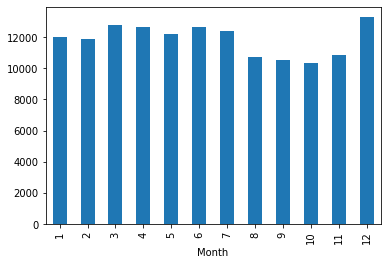

In [21]:
train_df.groupby('Month')['ObservedSales'].nunique().plot(kind='bar')

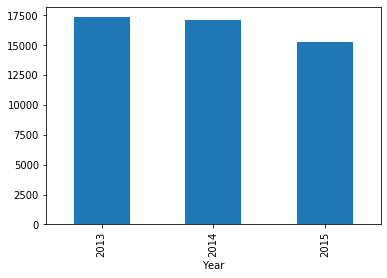

In [22]:
train_df.groupby('Year')['ObservedSales'].nunique().plot(kind='bar')

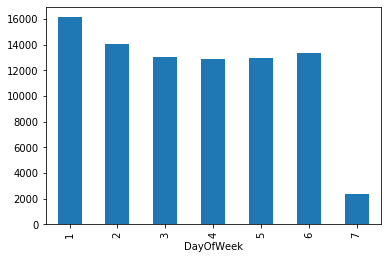

In [23]:
train_df.groupby('DayOfWeek')['ObservedSales'].nunique().plot(kind='bar')

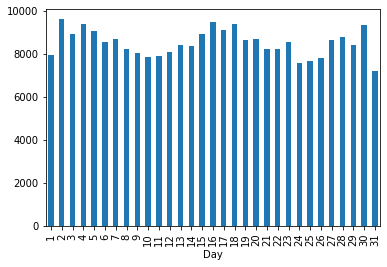

In [8]:
train_df.groupby('Day')['ObservedSales'].nunique().plot(kind='bar')

In [27]:
test = train_df.groupby('Promo')['ObservedSales'].nunique()
test.head()

Promo
False    16535
True     18147
Name: ObservedSales, dtype: int64

## ACP

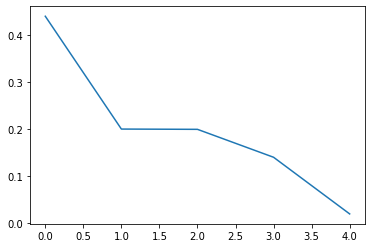

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
# réduction des variables
X=scale(train_df[["Store", "DayOfWeek", "Customers","ObservedSales","Month"]])

pca = PCA()
## Estimation, calcul des composantes principales
C = pca.fit(X).transform(X)
## Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_)
plt.show()

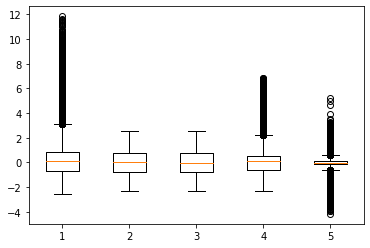

In [37]:
## distribution des composantes principales
plt.boxplot(C[:,0:20])
plt.show()

In [ ]:
## Repésentation des individus
#plt.figure(figsize=(5,5))
#for i, j, promo in zip(C[:,0], C[:,1], train_df["Promo"]):
#    color = "blue" if promo else "red"
#    plt.plot(i, j, "o",color=color)
#plt.axis((-4,6,-4,6))  
#plt.show()

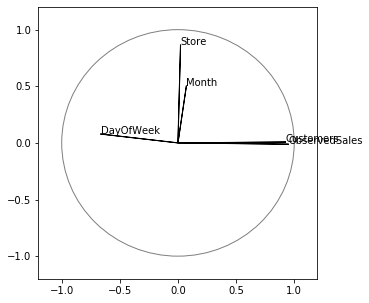

In [11]:
## coordonnées et représentation des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, train_df[["Store", "DayOfWeek", "Customers","ObservedSales","Month"]].columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

# Entrainement des modèles


## Random Forest  - test 1 (pas ouf)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# définition des paramètres
forest = RandomForestClassifier(n_estimators=10, 
   criterion='gini', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True, warm_start=True)
#forest = RandomForestClassifier(n_estimators=10, criterion='entropy')

# Boucle pour fit le modèle sur un jeu de données à chaque itération
nb_trials = 10
score = []
for i in range(nb_trials):
    forest.set_params(n_estimators=10*(i+1))
    X_train,X_test,z_train,z_test= train_test_split(train_data_df,train_solutions_df,train_size=1000,test_size=1000,random_state=42)
    forest.fit(X_train,z_train)
    print(i,end='')
print(" done!")



C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\felix\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\felix\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


01

C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


2

C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


3

C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


4

C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


5

C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


6

C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


7

C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


8

C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


9 done!


## Random Forest  - test 2 (bieeeeen gamin)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from functools import reduce

def generate_rf(X_train, y_train, X_test, y_test, n_estims):
    rf = RandomForestClassifier(n_estimators=n_estims, 
               criterion='gini', max_depth=None,
               min_samples_split=2, min_samples_leaf=1, 
               max_features='auto', max_leaf_nodes=None,
               bootstrap=True)
    #rf = RandomForestClassifier(n_estimators=10, min_samples_leaf=3)
    rf.fit(X_train, y_train)
    print("*")
    return rf

def combine_rfs(rf_a, rf_b):
    rf_a.estimators_ += rf_b.estimators_
    rf_a.n_estimators = len(rf_a.estimators_)
    return rf_a

X_train, X_test, y_train, y_test = train_test_split(train_data_df,train_solutions_df,train_size=5000,test_size=1000,random_state=42)
# in the line below, we create n_forests random forest classifier models
n_estims = 3
n_forests = 100
rfs = [generate_rf(X_train, y_train, X_test, y_test) for i in range(n_forests)]
# in this step below, we combine the list of random forest models into one giant model
rf_combined = reduce(combine_rfs, rfs)
print("done!")

C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*


C:\Users\felix\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


*
done!


In [3]:
# Creation set de données pour le test uniquement
X_train,X_test,z_train,z_test= train_test_split(train_data_df,train_solutions_df,test_size=10000,random_state=42)

z_chap = rf_combined.predict(X_test)
print("MSE=",mean_squared_error(z_test,z_chap))
print("R2=",r2_score(z_test,z_chap))

NameError: name 'train_test_split' is not defined

# Regression linéaire

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score

X_train,X_test,z_train,z_test=train_test_split(train_data_df,train_solutions_df,test_size=0.1,random_state=42)
# L'algorithme ds réseaux de neurones nécessite éventuellement une normalisation 
# des variables explicatives avec les commandes ci-dessous
scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(X_test)

regLasso = linear_model.Lasso()
regLasso.fit(Xr_train,z_train)

# Validation
z_chap=regLasso.predict(Xr_test)
print("MSE=",mean_squared_error(z_test,z_chap))
print("R2=",r2_score(z_test,z_chap))

MSE= 2182637.8759283526
R2= 0.8525049400705497


In [16]:
# Final test data (to submit)
X_test_final = scaler.transform(test_data_df)
z_chap=regLasso.predict(X_test_final)

# STACKING REGRESSORS
Stack of estimators with a final regressor.

Stacked generalization consists in stacking the output of individual estimator and use a regressor to compute the final prediction. Stacking allows to use the strength of each individual estimator by using their output as input of a final estimator.

In [42]:
# STACKING REGRESSOR
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

X_train,X_test,z_train,z_test=train_test_split(train_data_df,train_solutions_df,test_size=0.1,random_state=42)

# Scaling
scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)
Xr_test = scaler.transform(X_test)

In [43]:
# Model
estimators = [
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Lasso', LassoCV()),
    ('Gradient Boosting', HistGradientBoostingRegressor(random_state=0))
]
stacking_regressor = StackingRegressor(
    estimators=estimators, final_estimator=RidgeCV()
)
stacking_regressor.fit(Xr_train,z_train)

C:\Users\felix\anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py:642: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


StackingRegressor(cv=None,
                  estimators=[('Random Forest',
                               RandomForestRegressor(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                          

In [44]:
# save the classifier
from sklearn.externals import joblib
joblib.dump(stacking_regressor, 'stackingRegressor_HakunaMadata.pkl') 

['stackingRegressor_HakunaMadata.pkl']

In [ ]:
# load the classifier
stacking_regressor = joblib.load('stackingRegressor_HakunaMadata.pkl')

In [47]:
# Validation
z_chap=stacking_regressor.predict(Xr_test)
for i in range(z_chap.size) :
    if z_chap[i]<0 :
        z_chap[i]=0
print("MSE=",mean_squared_error(z_test,z_chap))
print("R2=",r2_score(z_test,z_chap))

MSE= 719983.2736200426
R2= 0.9513460399171246


In [48]:
# Test data
test_data_dfR=scaler.transform(test_data_df)
prev_test=stacking_regressor.predict(test_data_dfR)
for i in range(z_chap.size) :
    if z_chap[i]<0 :
        z_chap[i]=0
print(len(prev_test))
#np.savetxt("store_test.predict", prev_test,  fmt='%i')

203444


# STACKING REGRESSORS WITH AUGMENTED DATA

In [35]:
# STACKING REGRESSOR
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV


X_train,X_test,z_train,z_test=train_test_split(augmented_data_df,train_solutions_df,test_size=0.1,random_state=42)

# Scaling
scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)
Xr_test = scaler.transform(X_test)

ValueError: Found input variables with inconsistent numbers of samples: [1116, 712045]